In [1]:
from qiskit import QuantumCircuit

In [2]:
def get_circuit(angle_left, angle_right):
    circ = QuantumCircuit(2)
    circ.h(0)
    circ.cnot(0, 1)
    circ.x(1)
    circ.barrier()
    circ.ry(angle_left, 0)
    circ.ry(angle_right, 1)
    circ.measure_all()
    display(circ.draw('mpl'))
    return circ

# returns a circuit where 2 entangled qubits experience Ry rotations

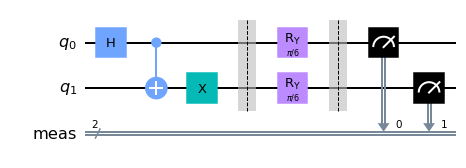

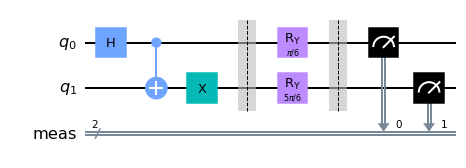

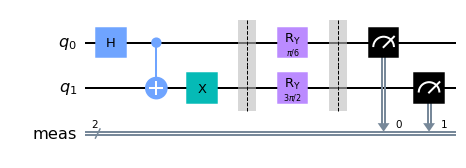

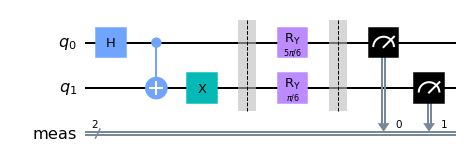

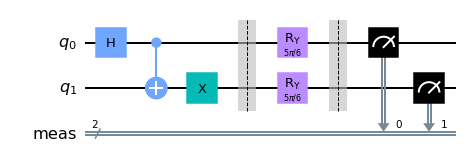

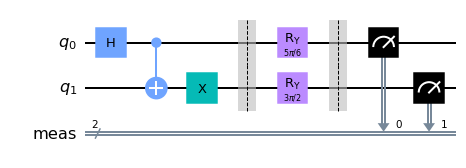

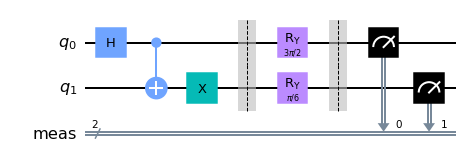

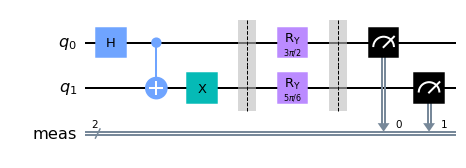

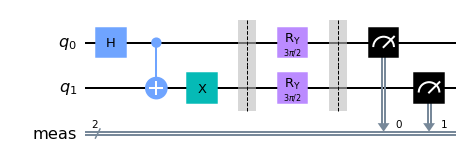

In [3]:
from math import pi

northwest = pi / 6
southwest = 5 * pi / 6
east = 9 * pi / 6
directions = [northwest, southwest, east]

circuits = []
for dir_left in directions:
    for dir_right in directions:
        circuits.append(
            get_circuit(dir_left, dir_right)
        )

In [4]:
from qiskit import IBMQ, execute

provider = IBMQ.load_account()
backends = provider.backends(operational=True, min_num_qubits=2)
for i in backends:
    print(i)


c:\Users\param\WorkSpace\quantum-computing\experimenting_qiskit\env\lib\site-packages\requests_ntlm\requests_ntlm.py:5: CryptographyDeprecationWarning: Python 3.6 is no longer supported by the Python core team. Therefore, support for it is deprecated in cryptography. The next release of cryptography will remove support for Python 3.6.
  from cryptography import x509


ibmq_qasm_simulator
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibm_sherbrooke
ibm_brisbane
ibm_kyoto
ibm_osaka


In [5]:
device = provider.get_backend('ibm_kyoto')

shots = 1000
job = execute(circuits, backend=device, shots=shots, memory=True)
result = job.result()

In [6]:
disagree = 0
for circ in circuits:
    memory = result.get_memory(circ)
    for meas in memory:
        if meas[0] != meas[1]:
            disagree += 1
print('\nProbability of disagreement: ', end='')
print(disagree/ (9 * shots))


Probability of disagreement: 0.48044444444444445
